In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421424


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551132
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838257


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421424


In [5]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


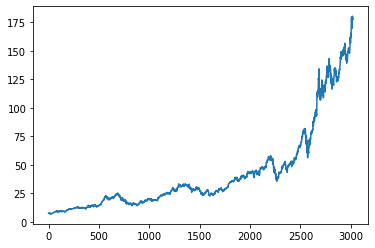

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

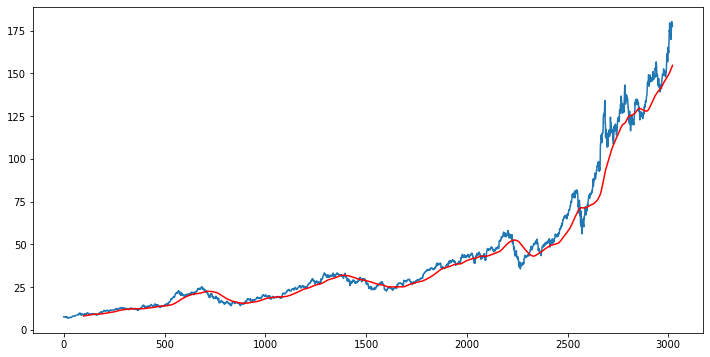

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

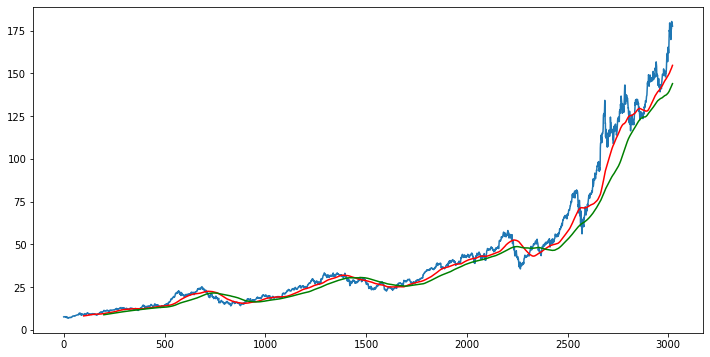

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(3022, 5)

In [12]:
#splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)

In [15]:
data_training_array


array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

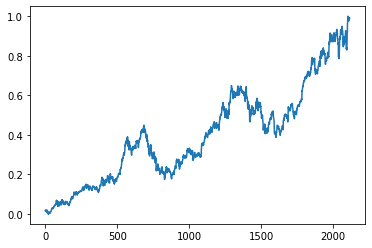

In [16]:
plt.plot(data_training_array)

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [18]:
# ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 19s 235ms/step - loss: 0.0423 - accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 15s 239ms/step - loss: 0.0078 - accuracy: 4.9628e-04
Epoch 3/50
63/63 [==============================] - 16s 253ms/step - loss: 0.0075 - accuracy: 4.9628e-04
Epoch 4/50
63/63 [==============================] - 15s 244ms/step - loss: 0.0064 - accuracy: 4.9628e-04
Epoch 5/50
63/63 [==============================] - 14s 230ms/step - loss: 0.0062 - accuracy: 4.9628e-04
Epoch 6/50
63/63 [==============================] - 17s 267ms/step - loss: 0.0063 - accuracy: 4.9628e-04
Epoch 7/50
63/63 [==============================] - 14s 227ms/step - loss: 0.0060 - accuracy: 4.9628e-04
Epoch 8/50
63/63 [==============================] - 19s 296ms/step - loss: 0.0053 - accuracy: 4.9628e-04
Epoch 9/50
63/63 [==============================] - 15s 232ms/step - loss: 0.0049 - accuracy: 4.9628e-04
Epoch 10/50
63/63 [==============================] - 17

In [22]:
#model.save('stock_model.h5')

In [23]:
data_testing.head()


,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [24]:
#fetching and appending 100 data
past_100_days = data_training.tail(100)

In [25]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Hrithik Seeburun\AppData\Local\Temp\ipykernel_9720\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [26]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [28]:
input_data.shape

(1007, 1)

In [29]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [31]:
y_predicted = model.predict(x_test)

In [32]:
y_predicted.shape


(907, 1)

In [33]:
y_test


array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [34]:
y_predicted


array([[0.20868324],
       [0.20889142],
       [0.20899795],
       [0.209019  ],
       [0.2089935 ],
       [0.20897308],
       [0.20901103],
       [0.20914817],
       [0.20939684],
       [0.20973185],
       [0.21011187],
       [0.21050608],
       [0.2108784 ],
       [0.21120128],
       [0.21144576],
       [0.21159251],
       [0.2116175 ],
       [0.2115131 ],
       [0.21128115],
       [0.21093136],
       [0.21046877],
       [0.20991668],
       [0.20930511],
       [0.20867419],
       [0.20805916],
       [0.20750159],
       [0.20701197],
       [0.20659728],
       [0.20628059],
       [0.20610112],
       [0.20608254],
       [0.20620362],
       [0.20645407],
       [0.20682144],
       [0.20728031],
       [0.2078034 ],
       [0.20835228],
       [0.20890304],
       [0.20943384],
       [0.20992777],
       [0.21038501],
       [0.21082558],
       [0.21126056],
       [0.21166438],
       [0.21200202],
       [0.2122496 ],
       [0.21249294],
       [0.212

In [35]:
scaler.scale_

array([0.00690691])

In [36]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [37]:
scale_factor

144.78250122070312

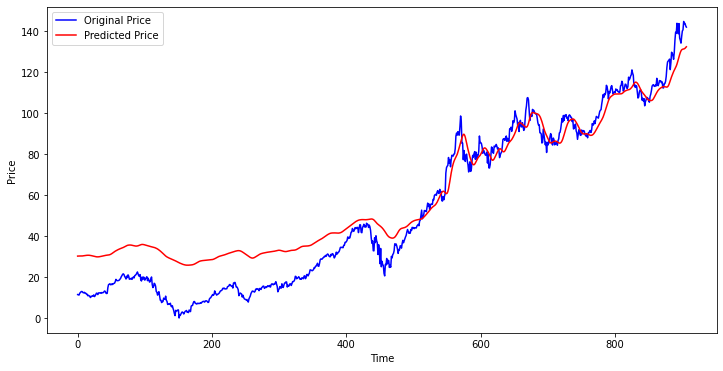

In [38]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()